#  Функция

In [2]:
import numpy as np
import operator
from functools import reduce
import matplotlib.pyplot as plt

In [5]:
# функция 
def f(x):
    return np.sin(x)

x_ans = np.pi / 4

#  Интерполяционный многочлен Лагранжа

In [27]:
points1 = [0.1 * np.pi, 0.2 * np.pi, 0.3 * np.pi, 0.4 * np.pi]

# омега
def w(p, x, i):
    return reduce(operator.mul, [x - p[j] for j in range(len(p)) if i != j])


def Lagrange_interpolation(x, p):
    res = 0
    coef = []
    for i in range(len(p)):
        f_w = f(p[i]) / w(p, p[i], i)
        res += f_w * w(p, x, i)
        coef.append(f_w)
    return res, coef

In [16]:
# значение интерполяционного многочлена лагранжа в точке
Lagrange_interpolation(x_ans, points1)[0]

0.7069466693335428

In [28]:
# коэффициенты многочлена
Lagrange_interpolation(x_ans, points1)[1]

[-1.6610453724212384,
 9.478488151818775,
 -13.046019725563589,
 5.112171997201982]

In [17]:
# значение функции в точке
f(x_ans)

0.7071067811865476

In [18]:
# погрешность
abs(f(x_ans) - Lagrange_interpolation(x_ans, points1)[0])

0.00016011185300479625

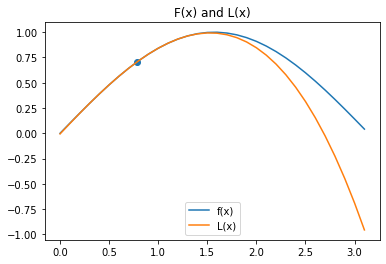

In [19]:
#графики
t = np.arange(0, np.pi, 0.1)
y1 = np.array([f(i) for i in t])
y2 = np.array([Lagrange_interpolation(t[i], points1)[0] for i in range(len(t))])
plt.plot(t,y1, label = 'f(x)')
plt.plot(t,y2, label = 'L(x)')
plt.scatter(x_ans, f(x_ans))
plt.title('F(x) and L(x)')
plt.legend(loc='lower center')

# Интерполяционный многочлен Ньютона

In [20]:
points2 = [0.1 * np.pi,  0.2 * np.pi, 0.3 *np.pi, 0.4 * np.pi]

# конечные разности
def finite_differences(x, p, i):
    return reduce(operator.mul, [x - p[j]  for j in range(i + 1)])

# вспомогательная функция
def foo(x, p, i):
    return reduce(operator.mul, [x - p[j] for j in range(i + 1) if x != p[j]])

# разделённые разности
def separated_differences (p, i):
    return reduce(operator.add, [f(p[j]) / foo(p[j], p, i) for j in range(i+1)])

def Newton_interpolation(x, p):
    res = f(p[0])
    coef = []
    coef.append(f(p[0]))
    for i in range(1, len(p)):
        res += separated_differences(p, i) * finite_differences(x, p, i - 1)
        coef.append(separated_differences(p, i))
    return res, coef

In [21]:
# значение интерполяционного многочлена ньютона в точке
Newton_interpolation(x_ans, points2)[0]

0.7069466693335428

In [22]:
# коэффициенты многочлена
Newton_interpolation(x_ans, points2)[1]

[0.3090169943749474,
 0.8873469244938121,
 -0.2914833943531754,
 -0.11640494896407017]

In [23]:
# значение функции в точке
f(x_ans)

0.7071067811865476

In [24]:
# погрешность
abs(f(x_ans) - Newton_interpolation(x_ans, points2)[0])

0.00016011185300479625

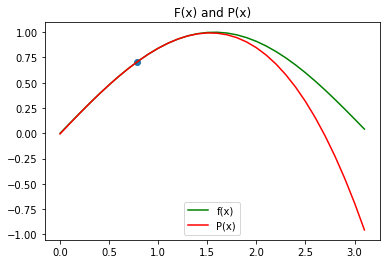

In [25]:
#графики
t = np.arange(0, np.pi, 0.1)
y1 = np.array([f(i) for i in t])
y2 = np.array([Newton_interpolation(t[i], points2)[0] for i in range(len(t))])
plt.plot(t,y1,'g', label = 'f(x)')
plt.plot(t,y2,'r', label = 'P(x)')
plt.scatter(x_ans, f(x_ans))
plt.title('F(x) and P(x)')
plt.legend(loc='lower center')